<a href="https://colab.research.google.com/github/bahmanravaei/Ising-oneDimensionalSequential/blob/main/Simulated_DA_Paper_input_form_file_Max_Cut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Simple and Sequential Python Code for Ising Model

for compare the result go to the following page:
https://www.sciencedirect.com/science/article/pii/S0377042709008309
or
https://biqmac.aau.at/biqmaclib.pdf

## Import some module

In [1]:
%matplotlib inline
from math import pi
import numpy as np
import matplotlib.pyplot as plt
# change some of the defaults for plots
plt.rcParams['text.usetex'] = False
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = [6,6]
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
from IPython.display import display, Markdown, Latex, Math, Pretty
from timeit import timeit
from numpy.random import rand, randint, seed
import networkx as nx


# Input data form a file

In [2]:
from google.colab import files
uploaded = files.upload()

Saving g05_100.9 to g05_100 (1).9


## Initialize connection weight
Import Data for weight from a file


In [3]:
fileContent=list(uploaded.values())[0]
fileContent=fileContent.splitlines()
fileContent = [item.decode() for item in fileContent]
fileContent = [item.split() for item in fileContent]
fileContent=[list( map(int,item) ) for item in fileContent]
NumberOfNodes=fileContent[0][0]
L= NumberOfNodes
NumberOfEdges=fileContent[0][1]


In [4]:
NumberOfEdges

2475

In [5]:
import networkx as nx
W=np.zeros((NumberOfNodes, NumberOfNodes))
Graph=nx.Graph()
Links=fileContent[1:]
for link in  Links:
  W[link[0]-1,link[1]-1]=link[2]
  W[link[1]-1,link[0]-1]=link[2]
  Graph.add_edge(link[0], link[1], weight=link[2])


In [6]:
W

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

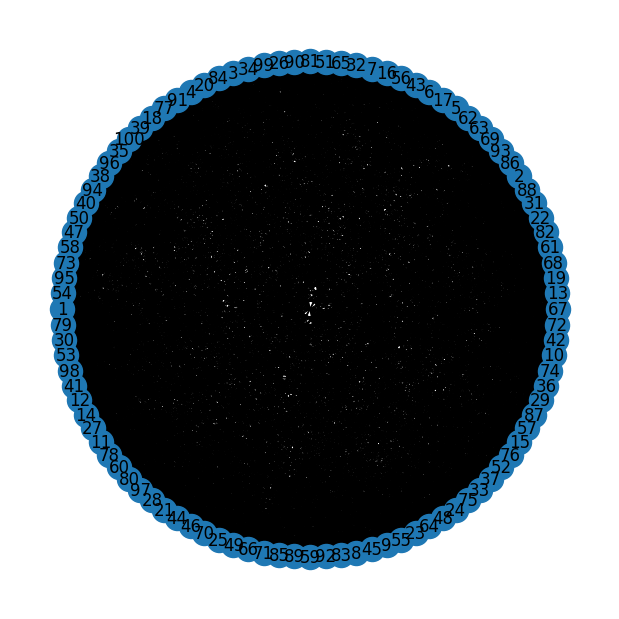

In [7]:
nx.draw_shell(Graph, with_labels = True)
#nx.draw(Graph, with_labels = True)



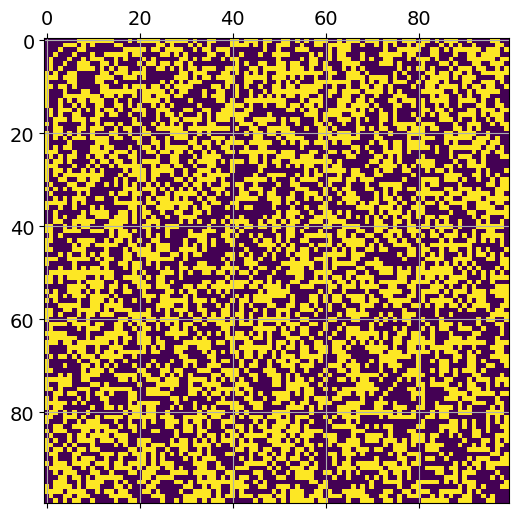

In [8]:
import matplotlib.pyplot as plt
#for i in range(NumberOfNodes):
#  W[i][i]=0
plt.matshow(W)

# Prepare Q and C for QUBO problem

In [9]:
Q=-W
r=np.sum(W,axis=1)

In [10]:
C=np.zeros(NumberOfNodes)
for i in range(NumberOfNodes):
  Q[i][i]=r[i]-W[i][i]

print(Q)
print(C)

[[58. -0. -0. ... -1. -0. -0.]
 [-0. 43. -0. ... -1. -1. -0.]
 [-0. -0. 48. ... -1. -0. -1.]
 ...
 [-1. -1. -1. ... 51. -0. -0.]
 [-0. -1. -0. ... -0. 58. -0.]
 [-0. -0. -1. ... -0. -0. 47.]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


# Prepare W and B for Ising problem (from Q and C)

In [11]:
B=np.zeros(NumberOfNodes)
for i in range(NumberOfNodes):
  for j in range(NumberOfNodes):
    B[i]=B[i]+Q[i][j]+Q[j][i]
  B[i]=B[i]+2*C[i]

B=B/4
A=Q/4

print(A)
print(B)

[[14.5  -0.   -0.   ... -0.25 -0.   -0.  ]
 [-0.   10.75 -0.   ... -0.25 -0.25 -0.  ]
 [-0.   -0.   12.   ... -0.25 -0.   -0.25]
 ...
 [-0.25 -0.25 -0.25 ... 12.75 -0.   -0.  ]
 [-0.   -0.25 -0.   ... -0.   14.5  -0.  ]
 [-0.   -0.   -0.25 ... -0.   -0.   11.75]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


## Set the Configuration Parameter

In [12]:

#L = 1024           # Number of State variables
#Lsqrt=32

#L=400              # Number of State variables  (reduce Number of state to run quickly)
#Lsqrt=20
#L = 200

#kB = 1.0         # Boltzman constant

#seed(10)
# help( randint )

T = 1.0           # temperature
n = 10000         # the number of Monte Carlo time steps
P = 100           # sorta like 1000 milliseconds in a second


## Show Matrix A

[[14.5  -0.   -0.   ... -0.25 -0.   -0.  ]
 [-0.   10.75 -0.   ... -0.25 -0.25 -0.  ]
 [-0.   -0.   12.   ... -0.25 -0.   -0.25]
 ...
 [-0.25 -0.25 -0.25 ... 12.75 -0.   -0.  ]
 [-0.   -0.25 -0.   ... -0.   14.5  -0.  ]
 [-0.   -0.   -0.25 ... -0.   -0.   11.75]]


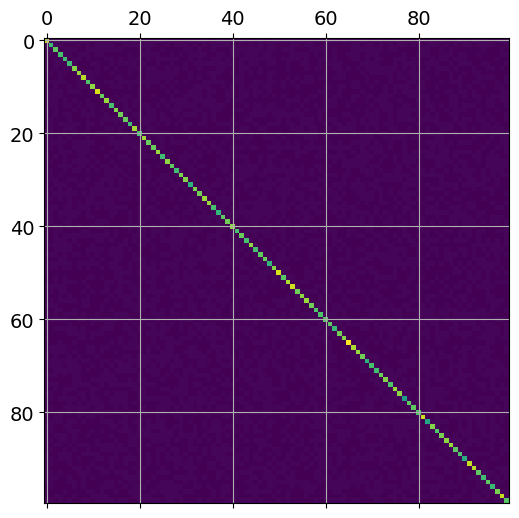

In [13]:

plt.matshow(A)
print(A)

## Create vector of state varialble

In [14]:
def createVector( L ) :
    """
        Creates a vector of length of L of random spins, $X_{i} = \pm 1$.
        Value for each state is 0 and 1
    """
    return ( rand( L) < 0.5 ) * 2 - 1   #        Value for each state is -1 and 1
    #return ( rand( L) < 0.5 ) * 1        #        Value for each state is 0 and 1

### Ilustration of state values

In [15]:
Y = createVector( L )

In [16]:
Y

array([-1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,
       -1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1,  1, -1, -1,  1,  1,  1,
       -1,  1,  1, -1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1,  1, -1, -1,
       -1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1])

In [17]:
def convertXtoY(X):
  return 2*X-1

def convertYtoX(Y):
  return (Y+1)/2

## Define Function for Energy and deltaEnergy

In [18]:
def energy(A, X, L, B) :
    Y=X.reshape(-1,L)
    newX=X.reshape(L, -1)
    E=np.sum(np.multiply(A,np.matmul(newX, Y)))
    #E = np.matmul(np.matmul(W, X.transpose()), X)
    #E= E+ np.matmul(X.transpose(), B)   # without considering B
    return - E
    #return -W * ( np.sum( s[0:L-1,:] * s[1:L,:] ) + np.sum( s[:,0:L-1] * s[:,1:L] ) )

def magnetization( Y, L ) :
    return np.sum( Y ) / L


def maxCutSize(W,cut,L):
  return cut.T@W@(1-cut)



In [19]:
print(energy(A,Y,L,B), ' \t' , maxCutSize(W, convertYtoX(Y),L))

-1256.0  	 1256.0


In [20]:
# This funciton need some revision
def deltaEnergy(Y,i, A, B):
  row_i=A[i]
  #h_i=(np.matmul(row_i, X.transpose())+B[i])    #without B
  h_i=np.matmul(row_i, Y)
  #delta=-1*(1-2*X[i])*h_i
  delta=Y[i]*h_i
  return delta



### Illustration of effect of fliping each bit on Energy of Ising Model

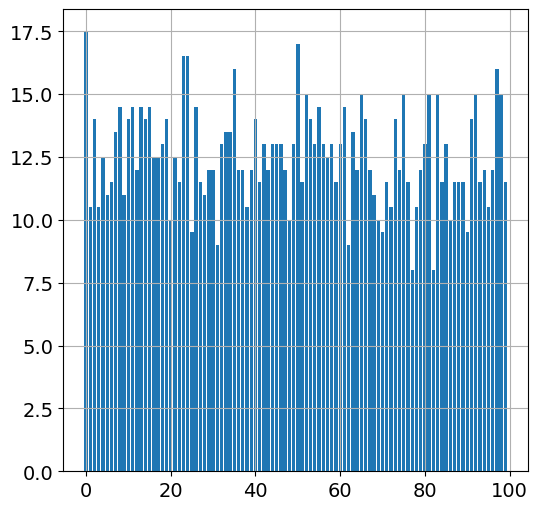

In [21]:
D=np.zeros(L)
for i in range(L):
  D[i]=deltaEnergy(Y,i, A, B)
plt.bar(range(L),D)
plt.show()

In [22]:
D

array([17.5, 10.5, 14. , 10.5, 12.5, 11. , 11.5, 13.5, 14.5, 11. , 14. ,
       14.5, 12. , 14.5, 14. , 14.5, 12.5, 12.5, 13. , 14. , 10. , 12.5,
       11.5, 16.5, 16.5,  9.5, 14.5, 11.5, 11. , 12. , 12. ,  9. , 13. ,
       13.5, 13.5, 16. , 12. , 12. , 10.5, 12. , 14. , 11.5, 13. , 12. ,
       13. , 13. , 13. , 12. , 10. , 13. , 17. , 11.5, 15. , 14. , 13. ,
       14.5, 13. , 12.5, 13. , 11.5, 13. , 14.5,  9. , 13.5, 12. , 15. ,
       14. , 12. , 11. , 10. ,  9.5, 11.5, 10.5, 14. , 12. , 15. , 11.5,
        8. , 10.5, 12. , 13. , 15. ,  8. , 15. , 11.5, 13. , 10. , 11.5,
       11.5, 11.5,  9.5, 14. , 15. , 11.5, 12. , 10.5, 12. , 16. , 15. ,
       11.5])

## MCMC (metropolis method)
Must be parallel and do it for all bit Concurrently

In [23]:
def metropolis( Y, oldE, A, B , L ) :
    # flip a random spin and calculate $dE$
    i = randint( L )
    #X[i] = 1-X[i]    # flip the i spin 0 => 1 or 1 => 0
    tempY=np.copy(Y)
    Y[i] *= -1    # flip the i spin -1 => 1 or 1 => -1
    E = energy(A, Y , L, B )
    deltaE = E - oldE
    # these are the Metropolis tests
    #print(i,': \t', tempY, '=>\t Y:', Y, '\t Energy: ', oldE ,'=>', E, '\t(', deltaE, ')\t', '\t')
    if deltaE < 0 :
        # keep the flipped spin because it lowers the energy
        #E = energy(A, X , L, B )
        return Y, E
    deltaOverT=(- deltaE / T)
    if rand() < np.exp(deltaOverT) :
        #return 1/0
        # keep the spin flip because the random number is less than $e^{-dE/T}$
        return Y, E

    # the spin flip is rejected
    #X[i] = 1-X[i]    # flip the ij spin back
    Y[i] *= -1    # flip the ij spin back
    E = oldE        # and keep the old energy
    return Y, E

## Define the Ising Function for calling metropolis function

In [24]:
def ising( Y, n, T ) :
    """
        Runs the Metropolis algorithm $n$ times on the lattice $X_{i}$.
    """
    M = np.zeros( n )         # used to store the magnetizations, $M(t)$
    CutSize = np.zeros(n)
    E = np.zeros( n )         # used to store the energy, $E(t)$
    E[0] = energy( A , Y, L, B )
    M[0] = magnetization( Y, L )
    X=convertYtoX(Y)
    CutSize[0]=maxCutSize(W,X,L)
    percent=int(n/20)
    #print(percent)
    for t in range( 1, n ) :     # $t$ is our pseudo-time
        Y, E[t] = metropolis( Y, E[t-1], A, B, L )
        M[t] = magnetization( Y, L )
        X=convertYtoX(Y)
        CutSize[t] = maxCutSize(W,X,L)
        #print(X, CutSize[t])
        #if t%percent==0:
          #print ((t/percent)*5)
          #if E[t]-E[t-percent+1]<0.000001:
           # break
    return M, E, CutSize

### Calling Ising function

In [25]:
#T=2

M, E, CutSize = ising( Y, n, T )



In [26]:
CutSize
np.max(CutSize)

1425.0

### Effect of N iteration of metropolis algorithm on Ising model state

## Plot the energy and magnetism of model after each iteration of Metropolis algorithm

# Plot the energy of model

Text(0, 0.5, '$E$')

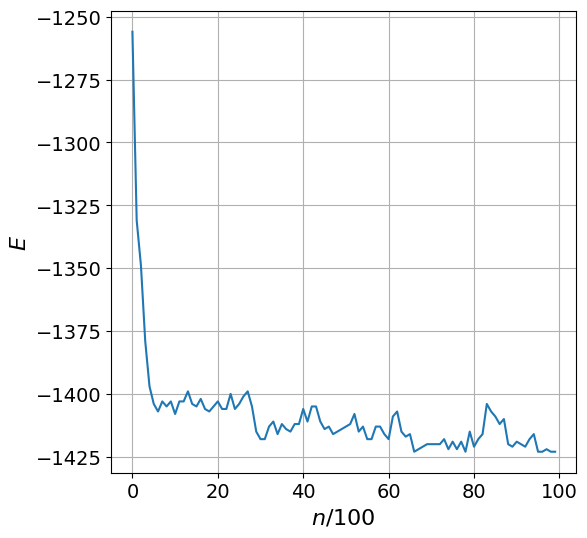

In [27]:
plt.plot( E[::P] )  # only plot every P-th point
plt.xlabel( '$n/%d$' % P )
plt.ylabel( '$E$' )

# Plot Cut size

Text(0, 0.5, '$Cut Size$')

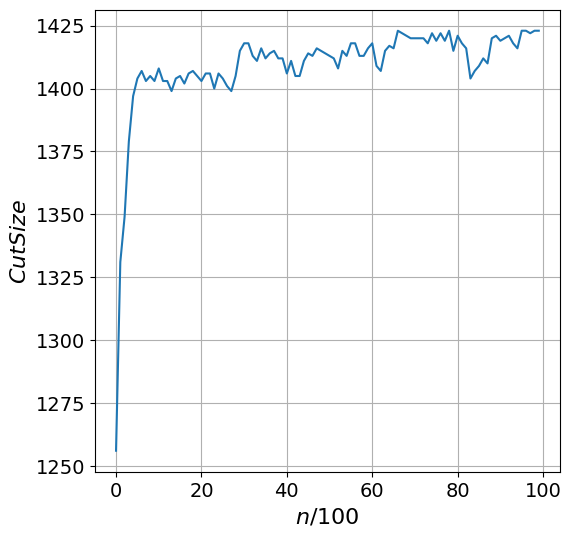

In [28]:
plt.plot( CutSize[::P] )  # only plot every P-th point
plt.xlabel( '$n/%d$' % P )
plt.ylabel( '$Cut Size$' )

## Run the Ising model for five different Temprature scenario

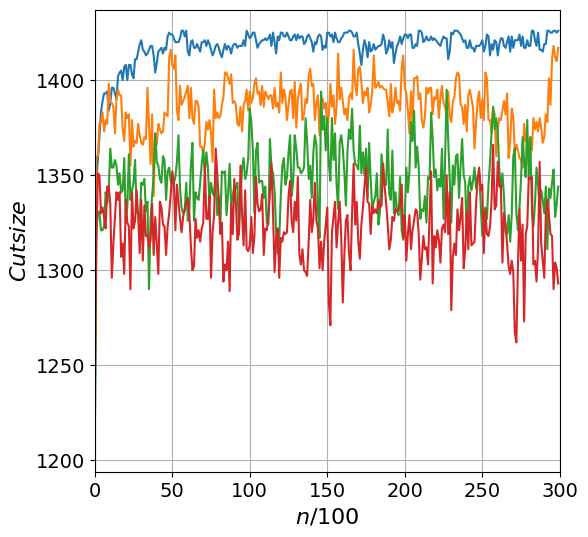

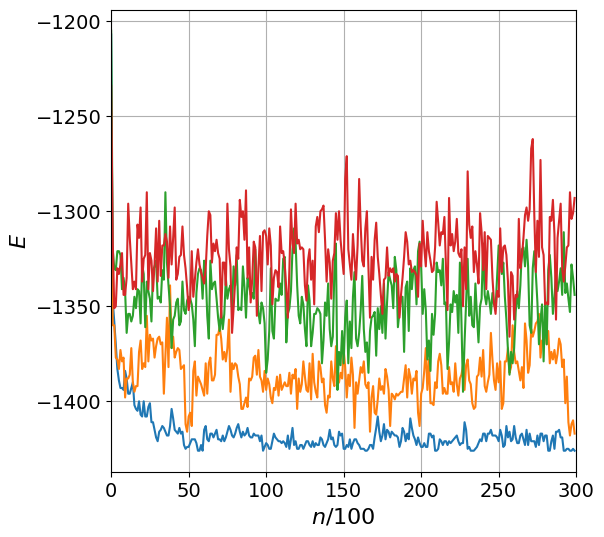

In [29]:
n = 30000               # increase the number of Monte Carlo time steps

fig, ax = plt.subplots()
ax.set_xlim( [ 0, n/P ] )
#ax.set_ylim( [-0.1, 1.1 ] )
plt.xlabel( '$n/%d$' % P )
plt.ylabel( '$Cutsize$' )

fig2, ax2 = plt.subplots()
ax2.set_xlim( [ 0, n/P ] )
plt.xlabel( '$n/%d$' % P )
plt.ylabel( '$E$' )

for T in range(1,5) :   # run the experiment 5 times
    Y = createVector( L )
    M, E, CutSize = ising( Y, n, T )
    ax.plot( CutSize[::P] )    # only plot every P-th point
    ax2.plot(E[::P])

#ax.plot( [0,n], [0,0] )

